In [1]:
### Notebook to calculate a typical continuum for stars with various SNR, no DIB ###

import numpy as np 
import matplotlib.pyplot as plt
import matplotlib

from astropy.io import fits 
from astropy.table import Table, join

CAresdir = '../StellarResidualsSpring2022/CACloudResiduals/'
modelresdir = '../StellarResidualsSpring2022/Residuals/'
# CA_meta = Table(fits.open(CAresdir + 'CA_meta.fits')[1].data)

In [2]:
CA = Table(fits.open('../CACloudISM/CA_221115.fits')[1].data)
tabfile = '/uufs/chpc.utah.edu/common/home/sdss/dr17/apogee/spectro/aspcap/dr17/synspec_rev1/allStarLite-dr17-synspec_rev1.fits'
allstars = Table(fits.open(tabfile)[1].data)
CA_joined = join(CA, allstars, keys = 'APOGEE_ID', uniq_col_name = '{col_name}{table_name}', table_names = ('', '_2'))
lambda0 = 15272.24

In [3]:
meta = Table(fits.open('../StellarResidualsSpring2022/Residuals/meta.fits')[1].data)

def get_medres(teff, logg, m_h, medres_dir = 'Residuals/'):
    rowselect = np.where(np.logical_and.reduce(
                    [teff >= meta['TEFF_MIN'], teff < meta['TEFF_MAX'], 
                    logg >= meta['LOGG_MIN'], logg < meta['LOGG_MAX'],
                   m_h >= meta['M_H_MIN'], m_h < meta['M_H_MAX']]))[0]
    
    row = meta[rowselect]
    filename = row['FNAME'].item()
    return medres_dir + filename

def get_aspcapStar(row):
    specdir = '/uufs/chpc.utah.edu/common/home/sdss/dr17/apogee/spectro/aspcap/dr17/synspec_rev1/{TELESCOPE}/{FIELD}/'
    specname = 'aspcapStar-dr17-{SOURCEID}.fits'
    telescope = np.array(row['TELESCOPE'], dtype = str)
    field = np.array(row['FIELD'], dtype = str)
    sourceid = np.array(row['APOGEE_ID'], dtype = str)
#     length = len(sourceid)
    path = (specdir + specname).format(TELESCOPE = telescope, FIELD = field, SOURCEID = sourceid)
    return path

def get_wavs(hdulist = None, rv = 0):
    if hdulist is None:
        CRVAL1 = 4.179
        CDELT1 = 6e-06
        LEN = 8575
    else:
        header = hdulist[1].header
        CRVAL1 = header['CRVAL1']
        CDELT1 = header['CDELT1']
        LEN = header['NAXIS1']
        
    wavs = np.power(10, CRVAL1 + CDELT1 * np.arange(LEN))
    wavs = wavs * (1 + rv / 3e5) # allows for shifting to observed frame from rest frame
    return wavs 
wavs = get_wavs()

In [4]:
tab_h = allstars[np.abs(allstars['GLAT']) > 30]
tab_h = tab_h[(tab_h['GAIAEDR3_PARALLAX'] > 1) & (tab_h['M_H'] > -0.5) & (tab_h['ALPHA_M'] < 0.15)]
print(len(tab_h))

166522


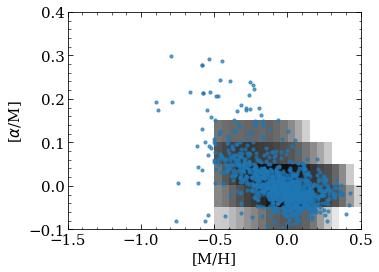

In [5]:
m_h_min, m_h_max, m_h_d = (-2., 0.6, 0.05)

alpha_min, alpha_max, alpha_d = (-0.3, 0.4, 0.05)
aspect = (m_h_max - m_h_min) / (alpha_max - alpha_min) * 0.8
m_h_bins = np.arange(m_h_min, m_h_max + m_h_d, m_h_d)
alpha_bins = np.arange(alpha_min, alpha_max + alpha_d, alpha_d)

amh_hist = np.histogram2d(tab_h['M_H'], tab_h['ALPHA_M'], bins = [m_h_bins, alpha_bins],)[0]
amh_hist[(np.isnan(amh_hist)) | (amh_hist < 25)] = np.nan

fig, ax = plt.subplots()
norm = matplotlib.colors.LogNorm(vmin = 20, vmax = 10000)

image = ax.imshow(amh_hist.T, extent = (m_h_min, m_h_max, alpha_min, alpha_max), aspect = aspect, cmap = 'binary', norm = norm, origin = 'lower')
# ax.scatter(stars['M_H'], stars['ALPHA_M'], s = 0.1, alpha = 0.1, c = 'r')

ax.scatter(CA_joined['M_H'], CA_joined['ALPHA_M'], label = "CA Cloud", s= 10, alpha = 0.7)

ax.set_xlim(-1.5, 0.5)
ax.set_ylim(-0.1, 0.4)

ax.set_xlabel('[M/H]')
ax.set_ylabel(r'[$\alpha$/M]')
# fig.colorbar(image)
plt.show()


(array([96264., 47888.,  9655.,  3980.,  1512.,   942.,   683.,   514.,
          405.,   281.]),
 array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ],
       dtype=float32),
 <BarContainer object of 10 artists>)

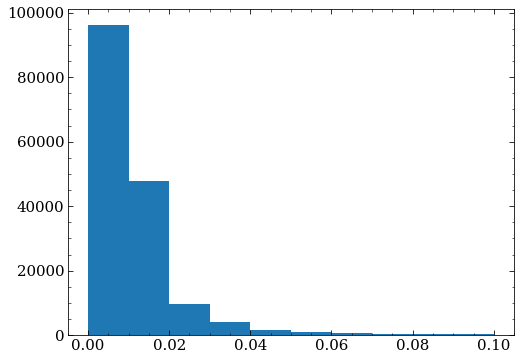

In [6]:
fig, ax = plt.subplots(figsize = (8,6))
ax.hist(tab_h['AK_TARG'], range = (0,0.1))

/uufs/chpc.utah.edu/sys/installdir/python/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


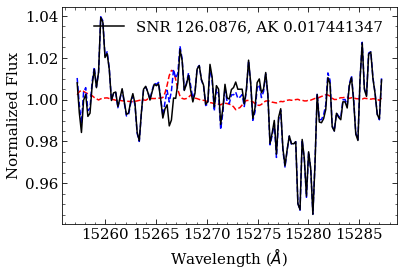

/uufs/chpc.utah.edu/sys/installdir/python/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


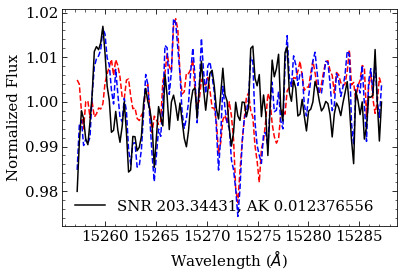

/uufs/chpc.utah.edu/sys/installdir/python/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


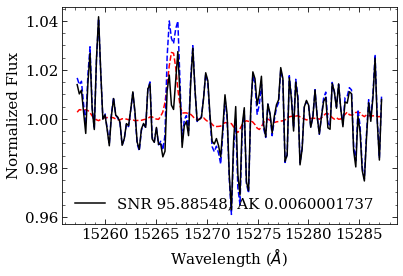

/uufs/chpc.utah.edu/sys/installdir/python/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


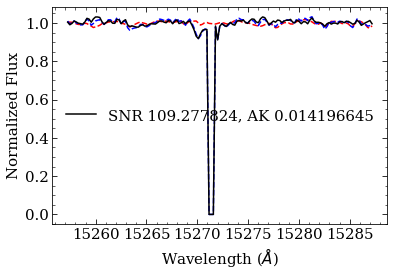

/uufs/chpc.utah.edu/sys/installdir/python/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


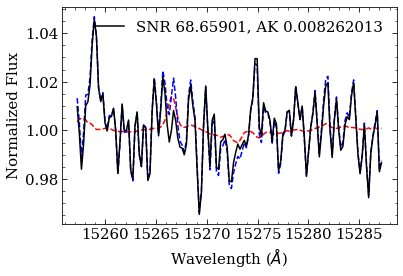

/uufs/chpc.utah.edu/sys/installdir/python/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


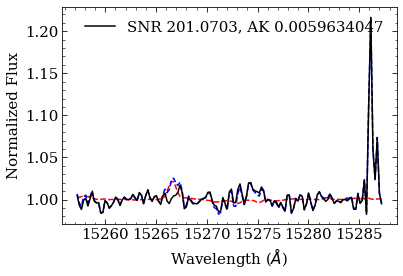

/uufs/chpc.utah.edu/sys/installdir/python/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


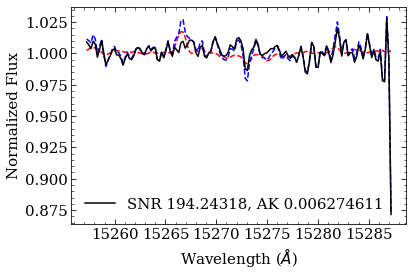

/uufs/chpc.utah.edu/sys/installdir/python/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


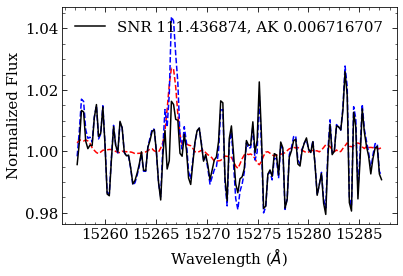

/uufs/chpc.utah.edu/sys/installdir/python/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


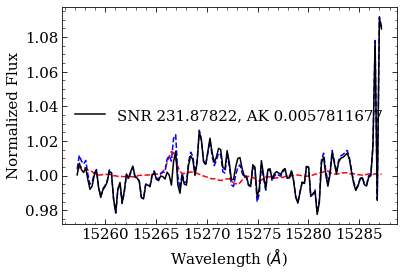

/uufs/chpc.utah.edu/sys/installdir/python/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


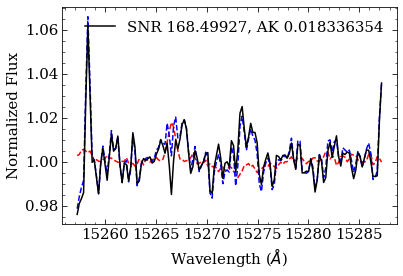

/uufs/chpc.utah.edu/sys/installdir/python/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


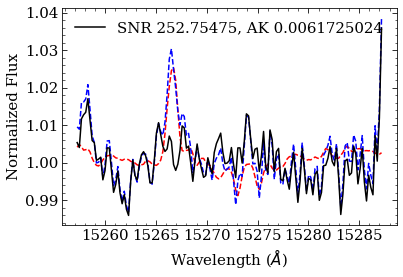

/uufs/chpc.utah.edu/sys/installdir/python/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


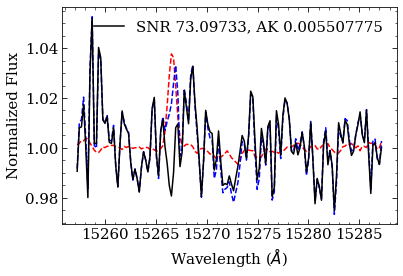

/uufs/chpc.utah.edu/sys/installdir/python/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


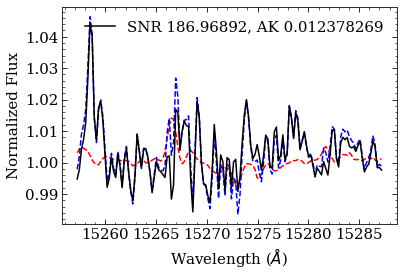

/uufs/chpc.utah.edu/sys/installdir/python/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


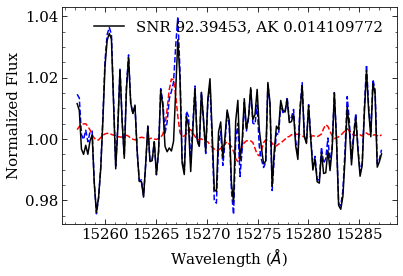

/uufs/chpc.utah.edu/sys/installdir/python/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


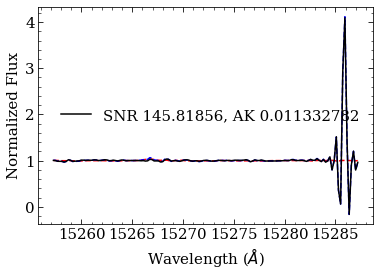

/uufs/chpc.utah.edu/sys/installdir/python/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


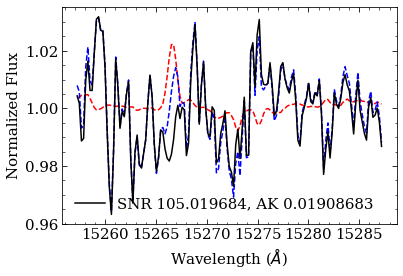

/uufs/chpc.utah.edu/sys/installdir/python/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


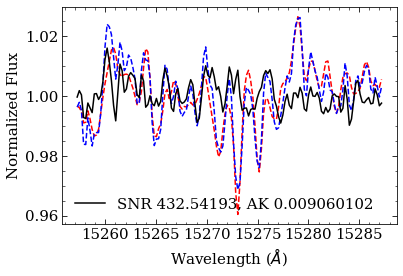

/uufs/chpc.utah.edu/sys/installdir/python/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


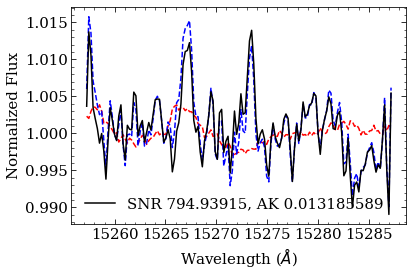

/uufs/chpc.utah.edu/sys/installdir/python/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


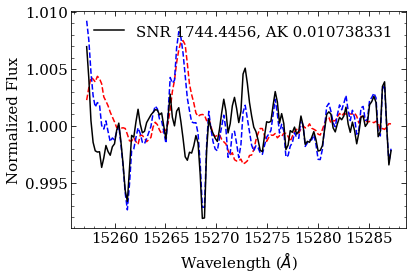

/uufs/chpc.utah.edu/sys/installdir/python/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


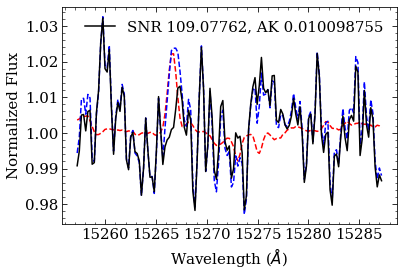

In [7]:
window = np.where(np.abs(wavs - lambda0) < 15)[0]
for i in range(20):
    star = tab_h[i]

    medres = fits.open(get_medres(star['TEFF'], star['LOGG'], star['M_H'],medres_dir = '../StellarResidualsSpring2022/Residuals/'))
    res_correction = medres[1].data
    aspcap = fits.open(get_aspcapStar(star))
    res = aspcap[1].data / aspcap[3].data
    corrected_res = res / res_correction

    
    fig, ax = plt.subplots()
    ax.plot(wavs[window], res_correction[window], linestyle = 'dashed', color = 'r')
    ax.plot(wavs[window], res[window], linestyle = 'dashed', color = 'b')
    ax.plot(wavs[window], corrected_res[window], label = 'SNR '+ str(star['SNR'])+ ', AK '+  str(star['AK_TARG']), color = 'k')
    ax.set_xlabel('Wavelength ($\AA$)')
    ax.set_ylabel('Normalized Flux')
    ax.legend()
    plt.show()
